# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Attribute Information:
 1. age: continuous.
 2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 3. fnlwgt: continuous.
 4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
 5. education-num: continuous.
 6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,   Priv-house-serv, Protective-serv, Armed-Forces.
 8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 10. sex: Female, Male.
 11. capital-gain: continuous.
 12. capital-loss: continuous.
 13. hours-per-week: continuous.
 14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 class: >50K, <=50K

### Notes for Delve
1. One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.
2. Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.
3. The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.

In [3]:
print(data.shape)

(48842, 15)


In [4]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Replacing ? with Nan 

In [5]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

results:
1. no null or Nan Value.but the dataset is not using the default nan string for missing values, instead "?" is used. after convert '?' to Nan three columns ['workclass','occupation','native-country] have nan
2. there are 52 duplicated row.


In [6]:
df = data.copy()

## Remove nan value

In [7]:
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.shape

(45222, 15)

## Remove Duplicated

In [9]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# remove educational-num, capital-gain, capital-loss

#### Check 'education' & 'educational-num' columns

In [10]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [11]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

* As we can see, 'education' & 'educational-num' both columns have similer values.
* 'education' has string values
* 'educational-num' has numerical values
* all HS-grad from education represents 9 in education-num
* all Masters from education represents 14 in education-num and likewise.
* Both columns conveying same information
* So, we can remove 'education-num' colum

#### Drop capital-gain, and capital-loss columns¶


Text(0.5, 1.0, 'Histogram')

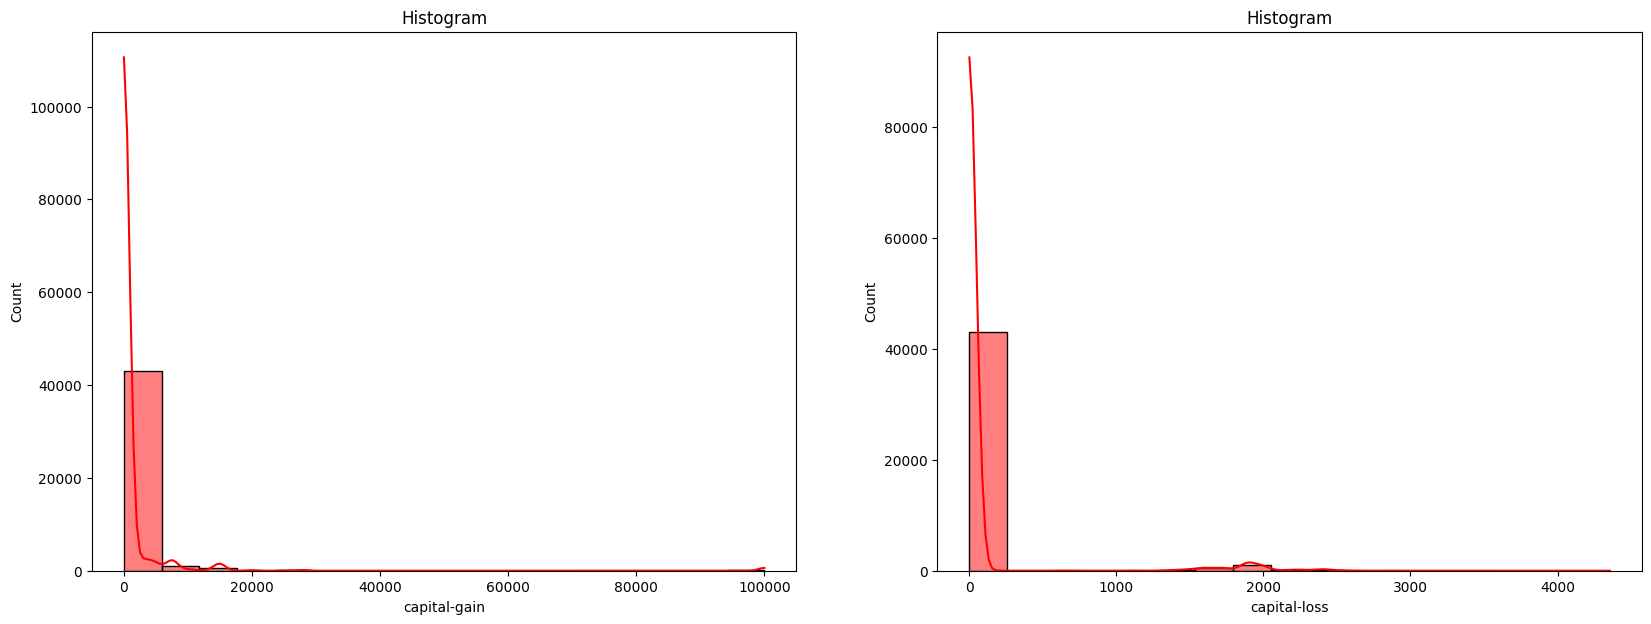

In [12]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

[ 'capital-gain' ] & [ 'capital-loss' ] both columns have 75% data as 0.00
So, we can drop [ 'capital-gain' ] & [ 'capital-loss' ] both columns

In [13]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)
df1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### Convert categorical cate to numerical using LableEncoder

In [14]:
from sklearn import preprocessing

In [15]:


label_encoder_gender = preprocessing.LabelEncoder()
df1['gender'] = label_encoder_gender.fit_transform(df1['gender'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_gender.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_workclass = preprocessing.LabelEncoder()
df1['workclass'] = label_encoder_workclass.fit_transform(df1['workclass'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_workclass.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_education = preprocessing.LabelEncoder()
df1['education'] = label_encoder_education.fit_transform(df1['education'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_education.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_marital_status = preprocessing.LabelEncoder()
df1['marital-status'] = label_encoder_marital_status.fit_transform(df1['marital-status'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_marital_status.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_occupation = preprocessing.LabelEncoder()
df1['occupation'] = label_encoder_occupation.fit_transform(df1['occupation'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_occupation.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_relationship = preprocessing.LabelEncoder()
df1['relationship'] = label_encoder_relationship.fit_transform(df1['relationship'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_relationship.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_race = preprocessing.LabelEncoder()
df1['race'] = label_encoder_race.fit_transform(df1['race'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_race.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_native_country = preprocessing.LabelEncoder()
df1['native-country'] = label_encoder_native_country.fit_transform(df1['native-country'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_native_country.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_income = preprocessing.LabelEncoder()
df1['income'] = label_encoder_income.fit_transform(df1['income'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_income.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)



Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Female', 1: 'Male'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Federal-gov', 1: 'Local-gov', 2: 'Private', 3: 'Self-emp-inc', 4: 'Self-emp-not-inc', 5: 'State-gov', 6: 'Without-pay'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Adm-clerical', 1: 'Armed-Forces', 2: 'Craft-repair', 3: 'Exec-managerial', 4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct', 7: 'Other-service', 8: 'Priv-

In [16]:
df1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,226802,1,4,6,3,2,1,40,38,0
1,38,2,89814,11,2,4,0,4,1,50,38,0
2,28,1,336951,7,2,10,0,4,1,40,38,1
3,44,2,160323,15,2,6,0,2,1,40,38,1
5,34,2,198693,0,4,7,1,4,1,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,7,2,12,5,4,0,38,38,0
48838,40,2,154374,11,2,6,0,4,1,40,38,1
48839,58,2,151910,11,6,0,4,4,0,40,38,0
48840,22,2,201490,11,4,0,3,4,1,20,38,0


In [17]:
# Check For Missing Values
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T    


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,8,8,8,8,8,8,8,8,8,8,8,8
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


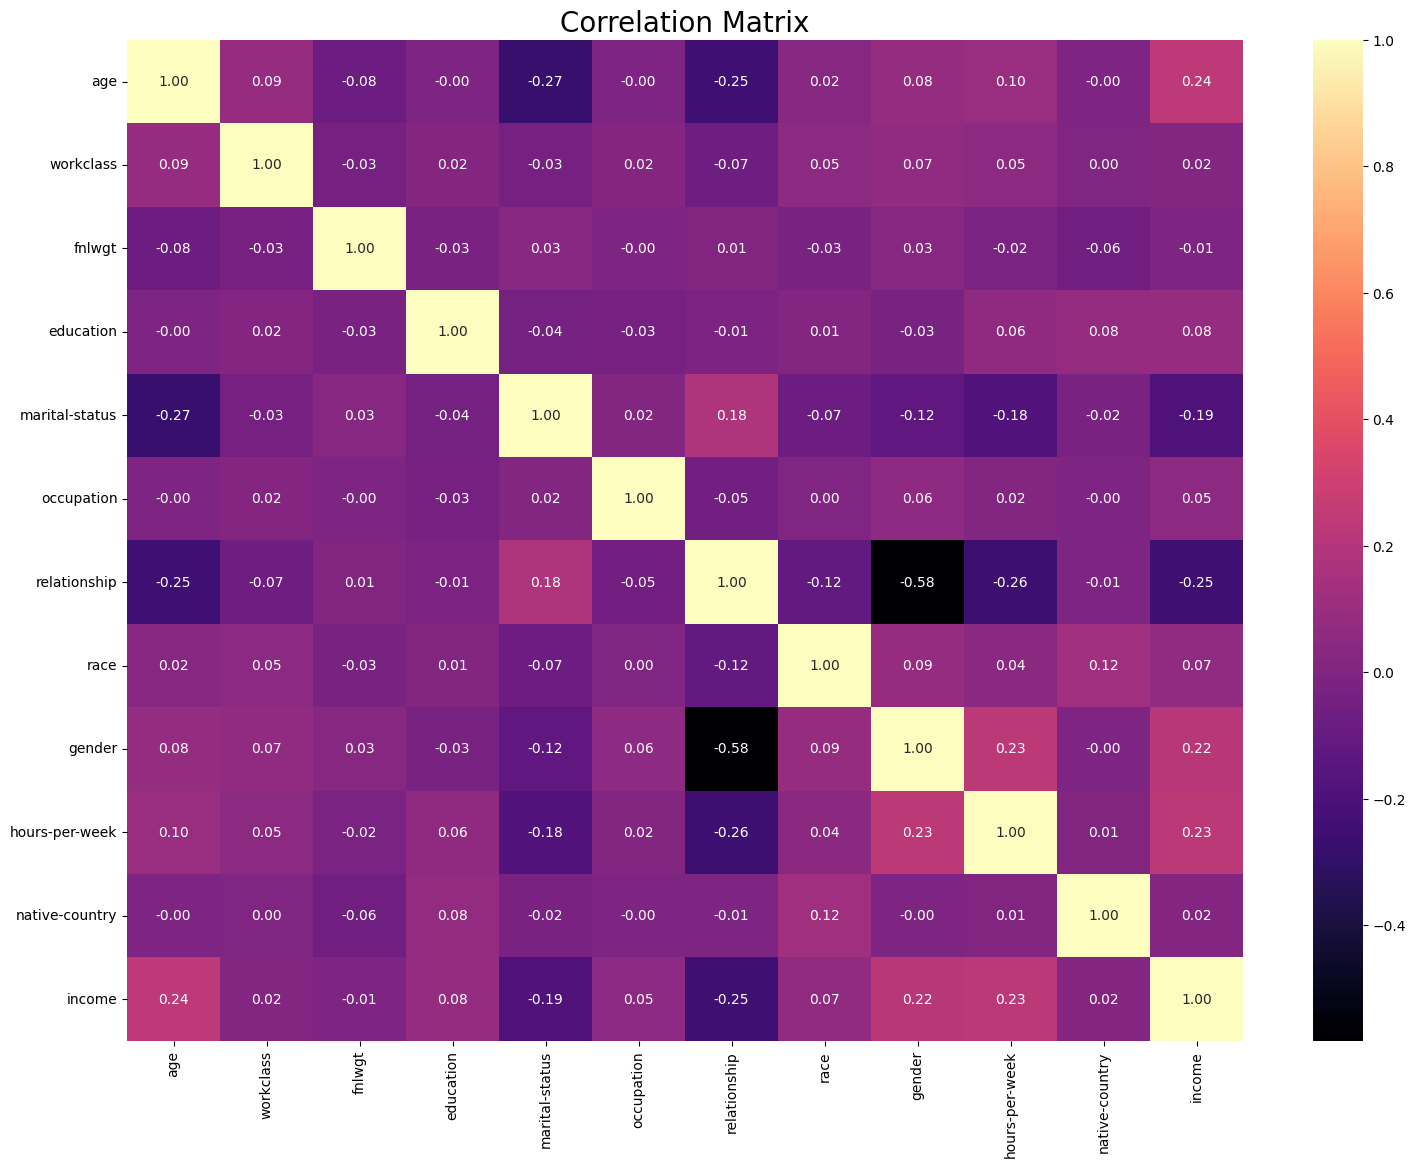

In [18]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [19]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

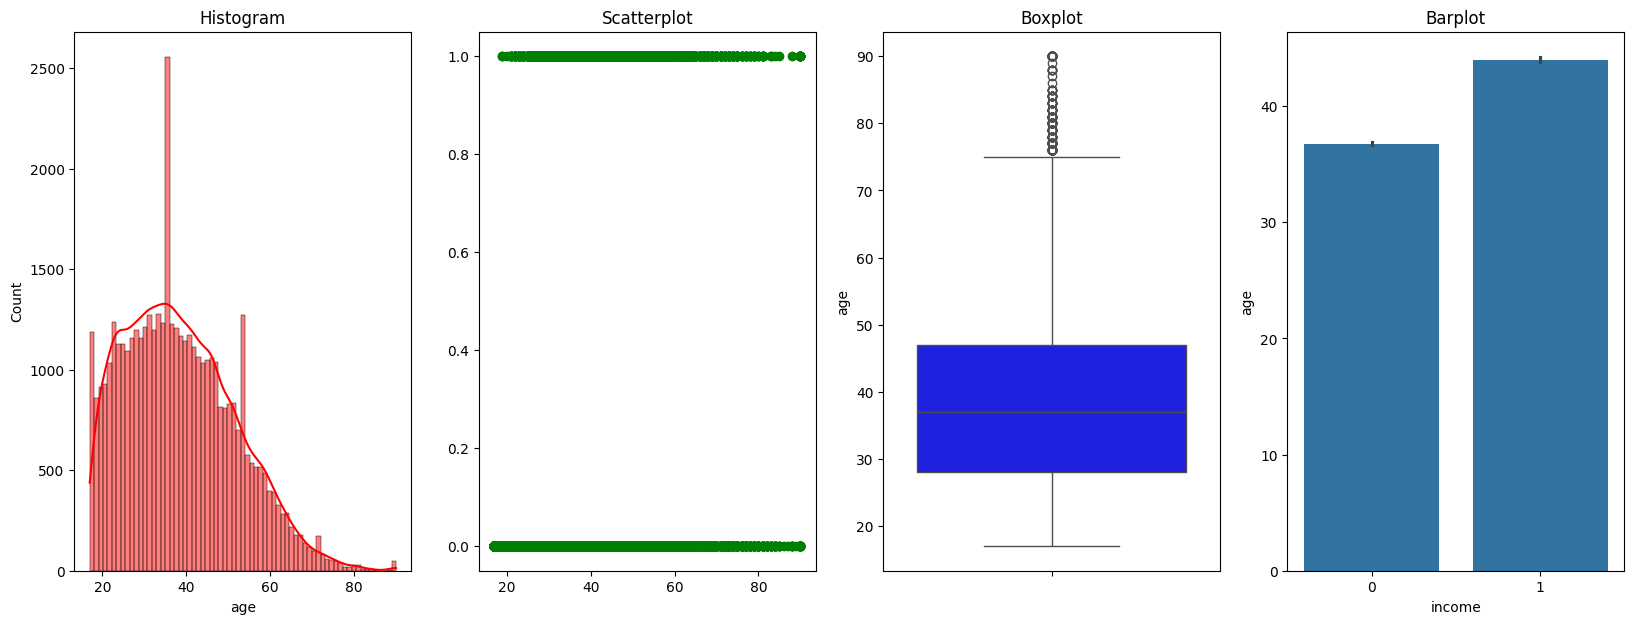

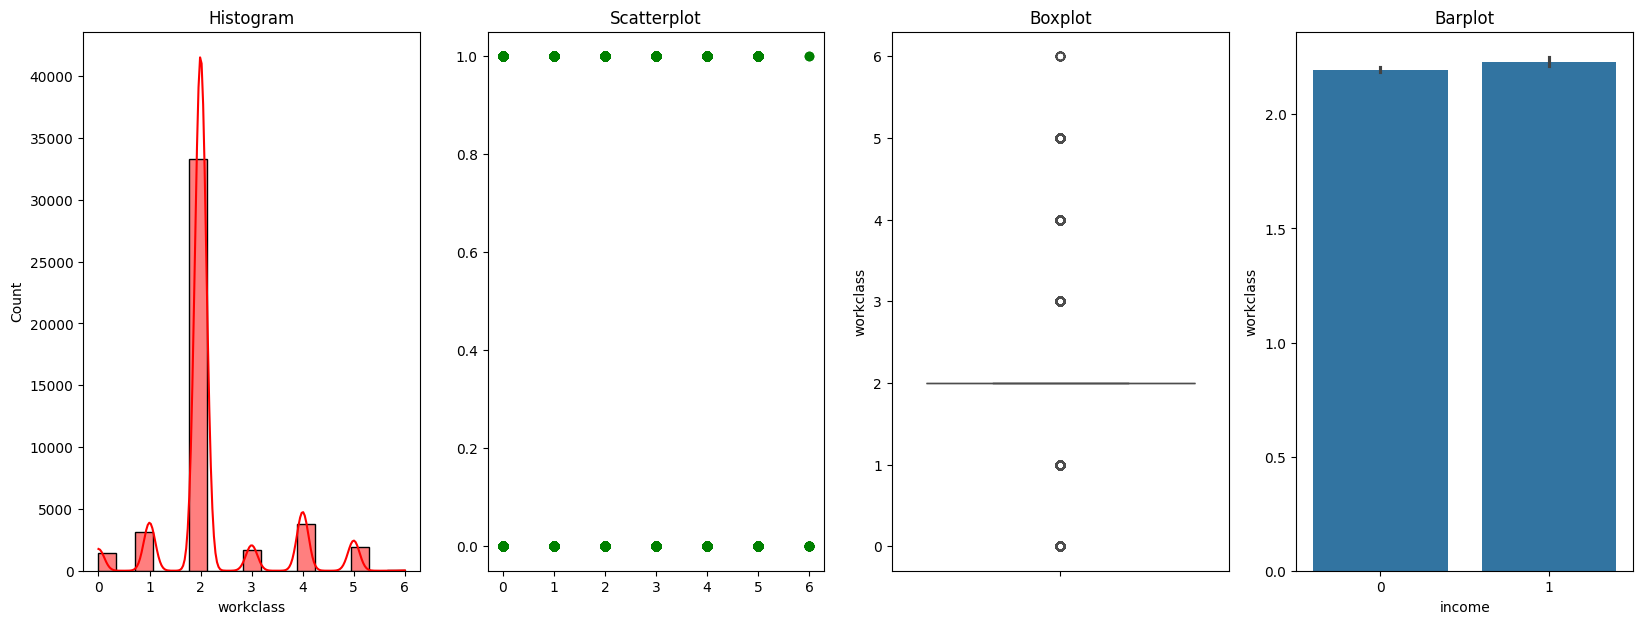

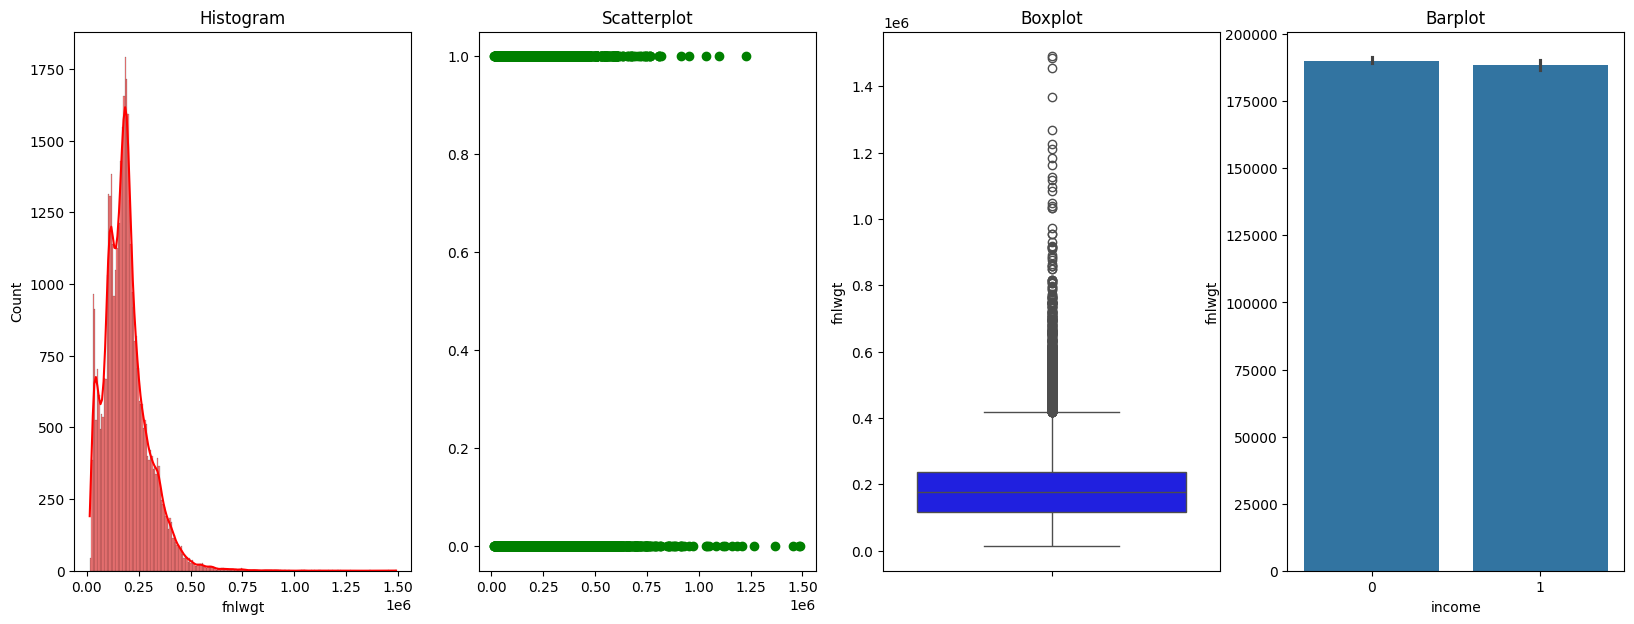

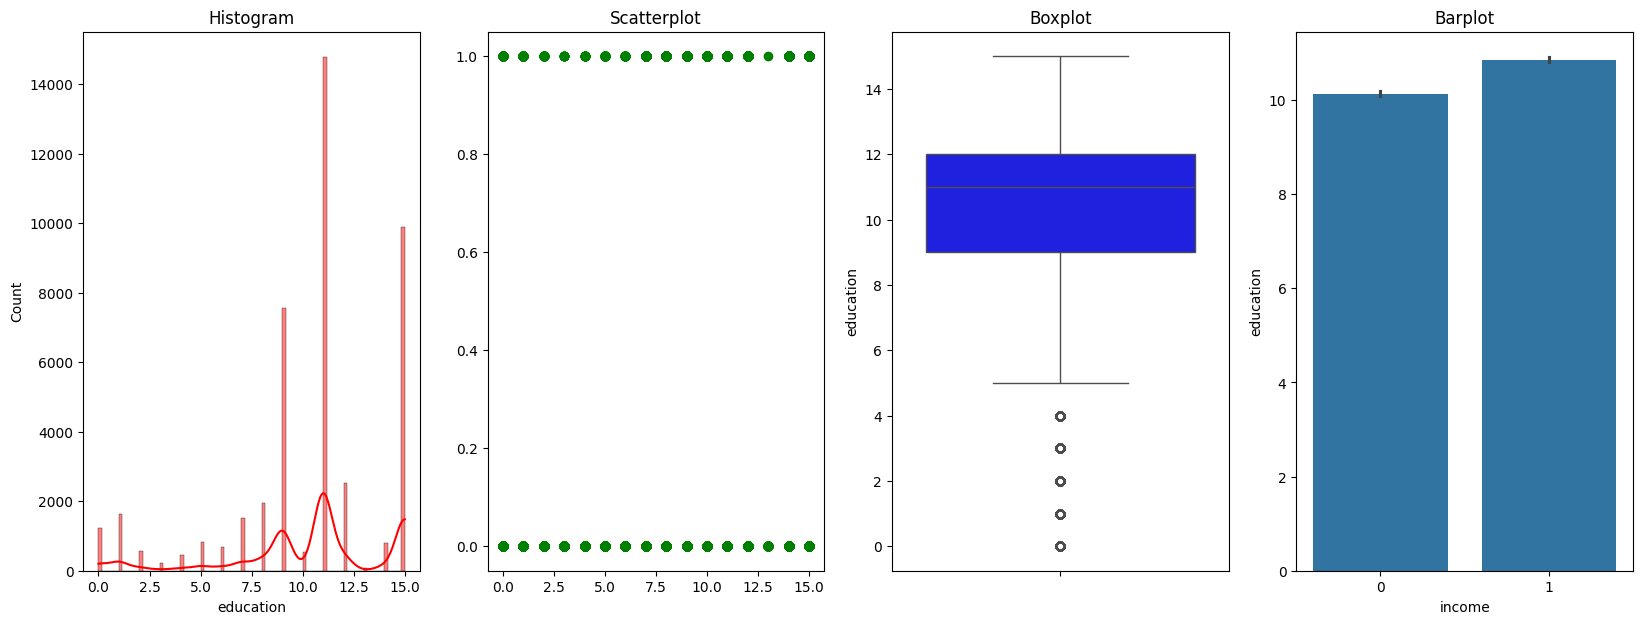

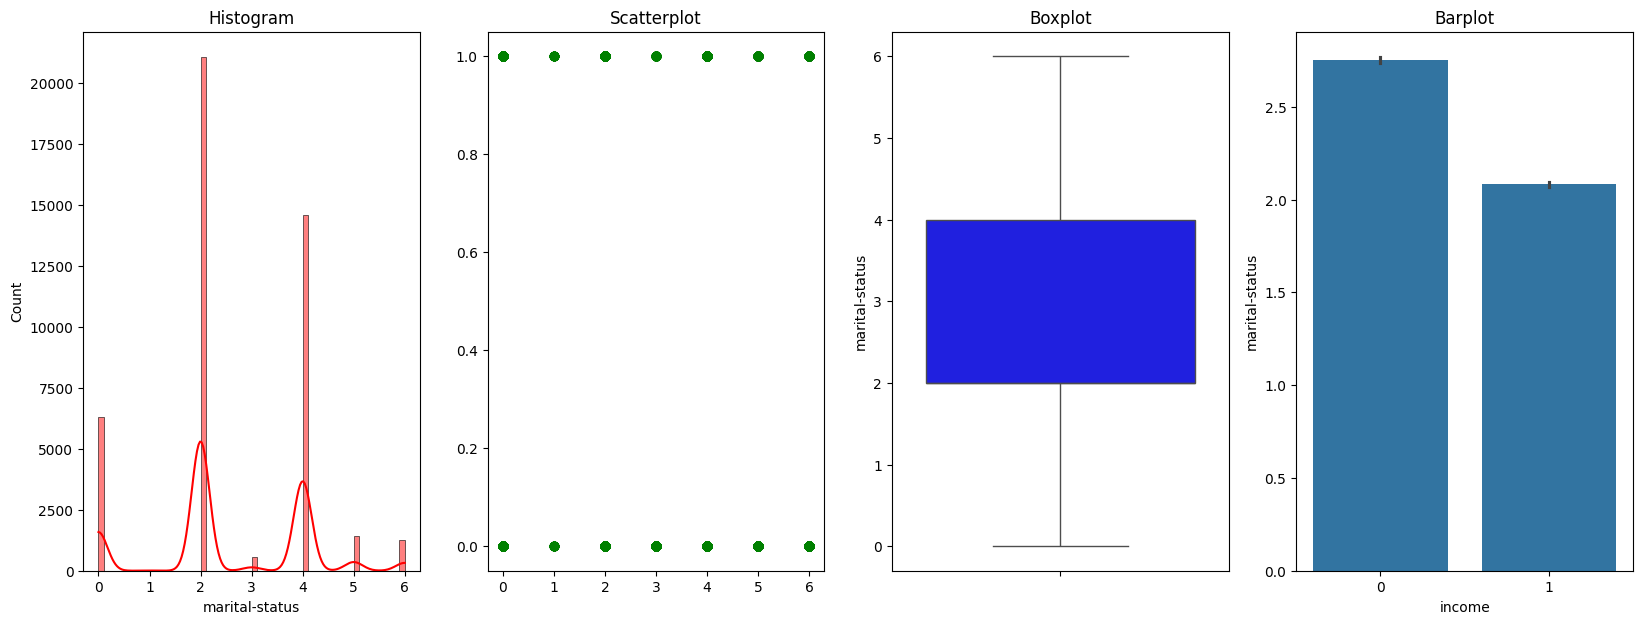

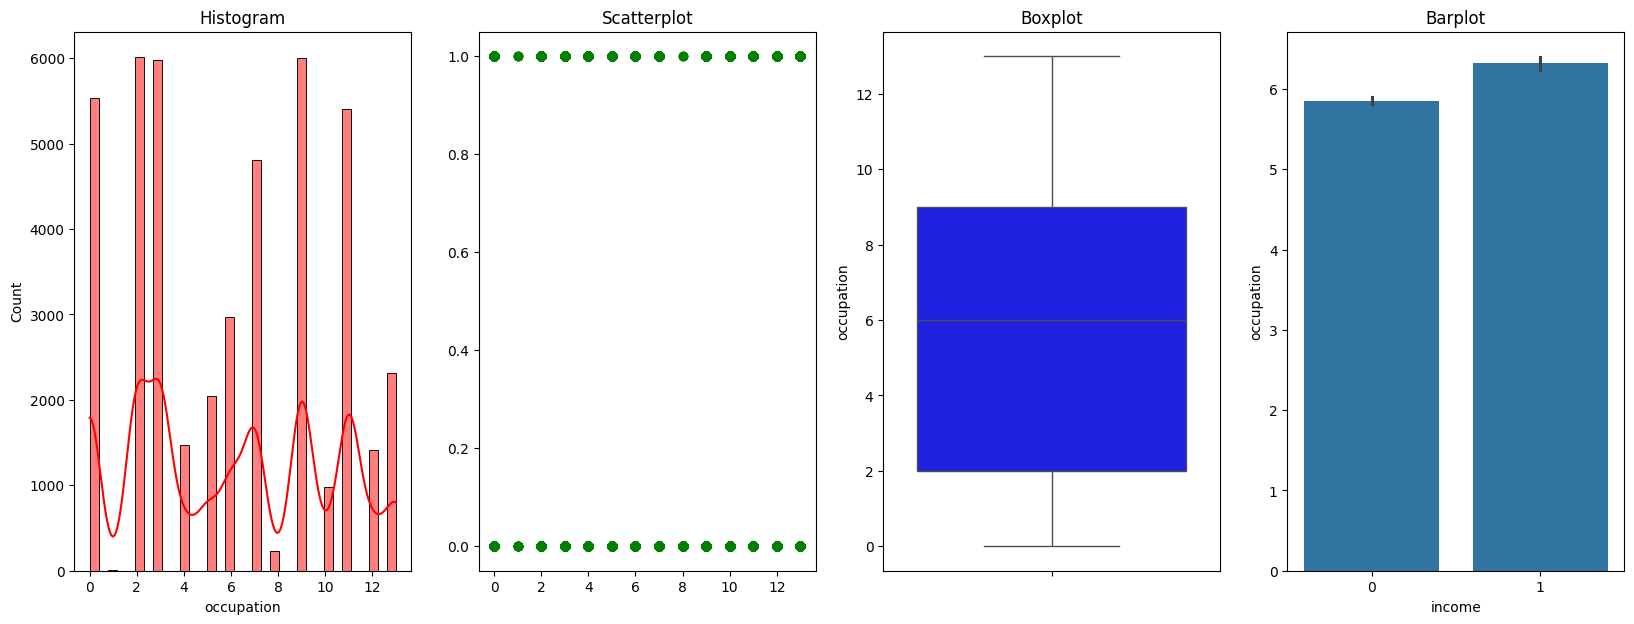

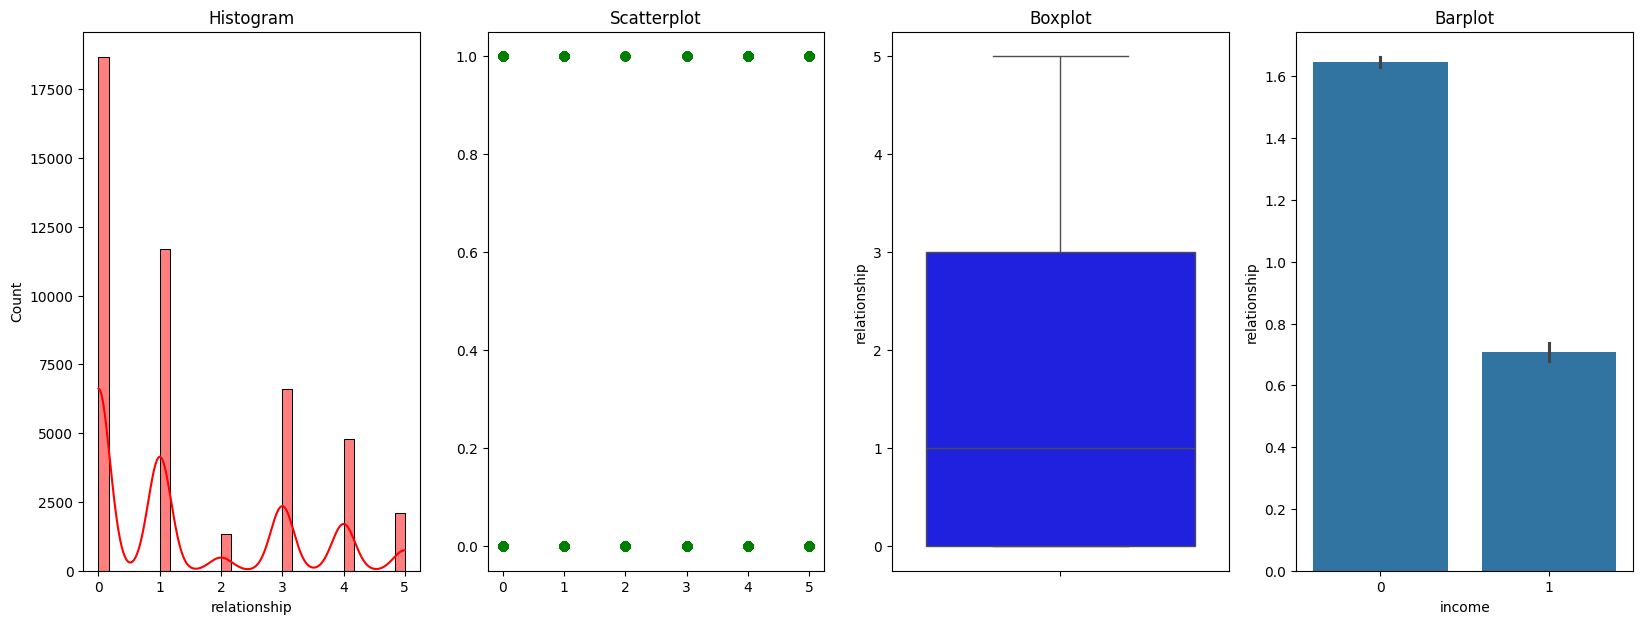

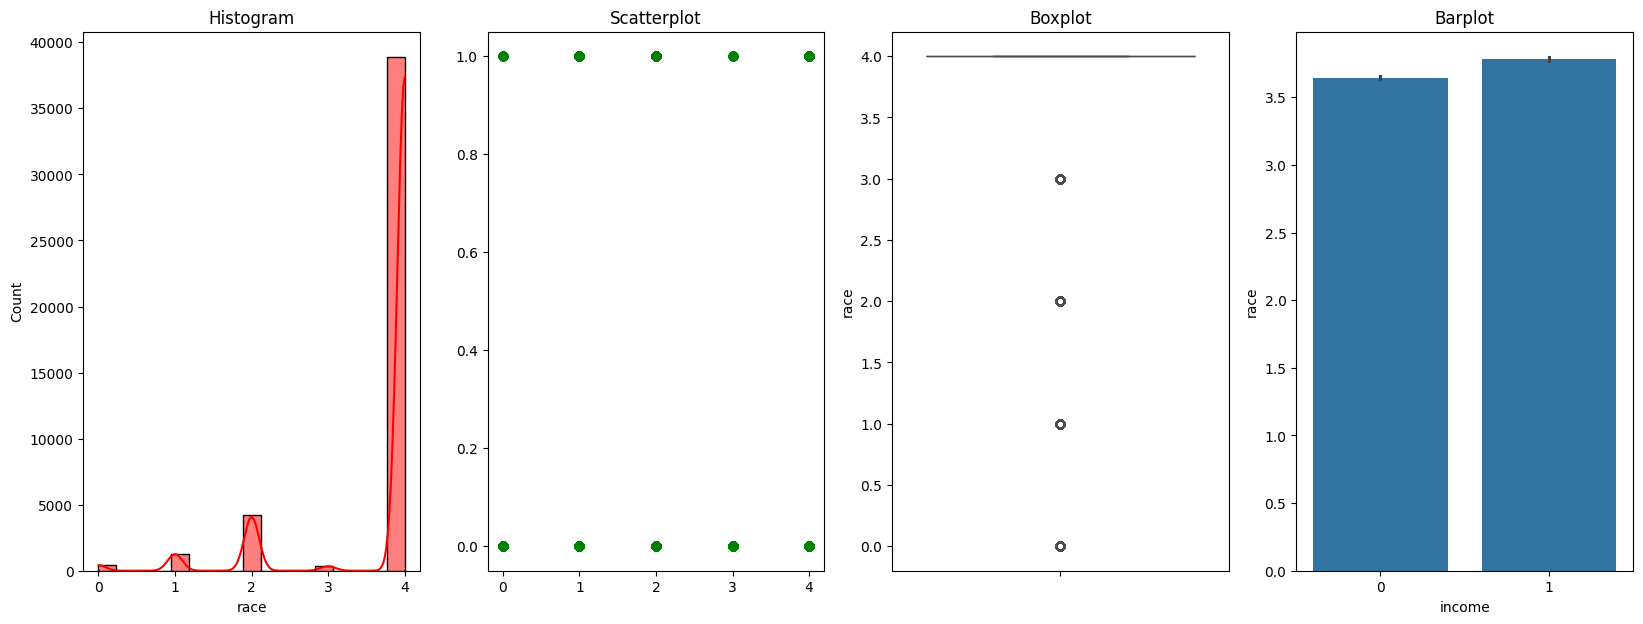

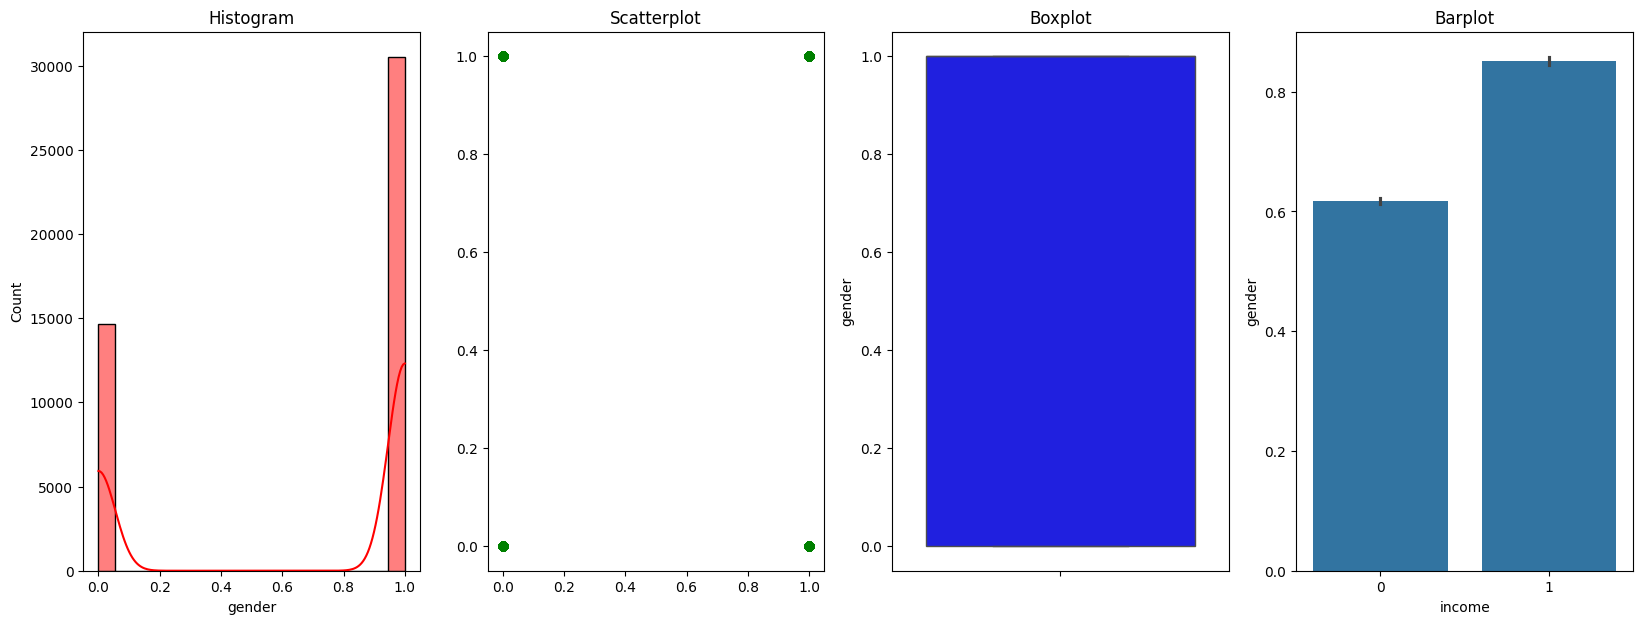

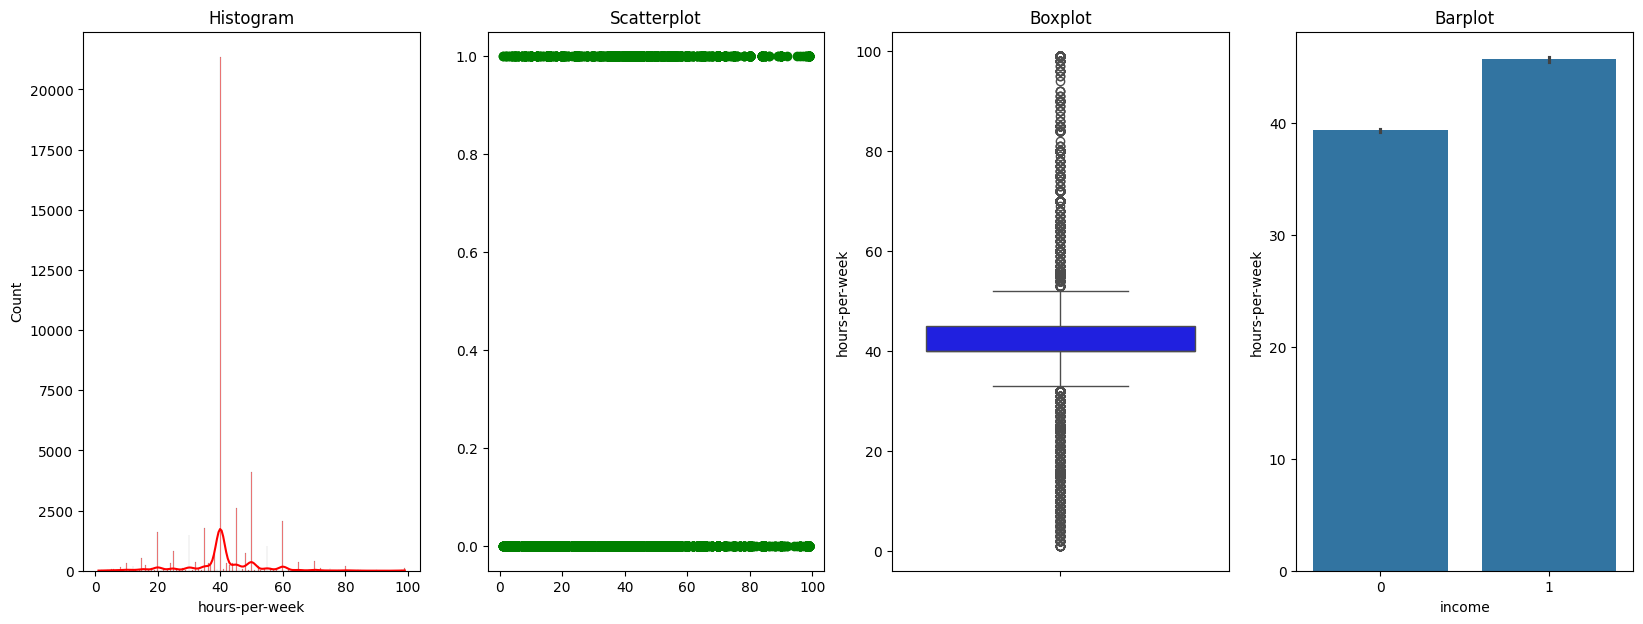

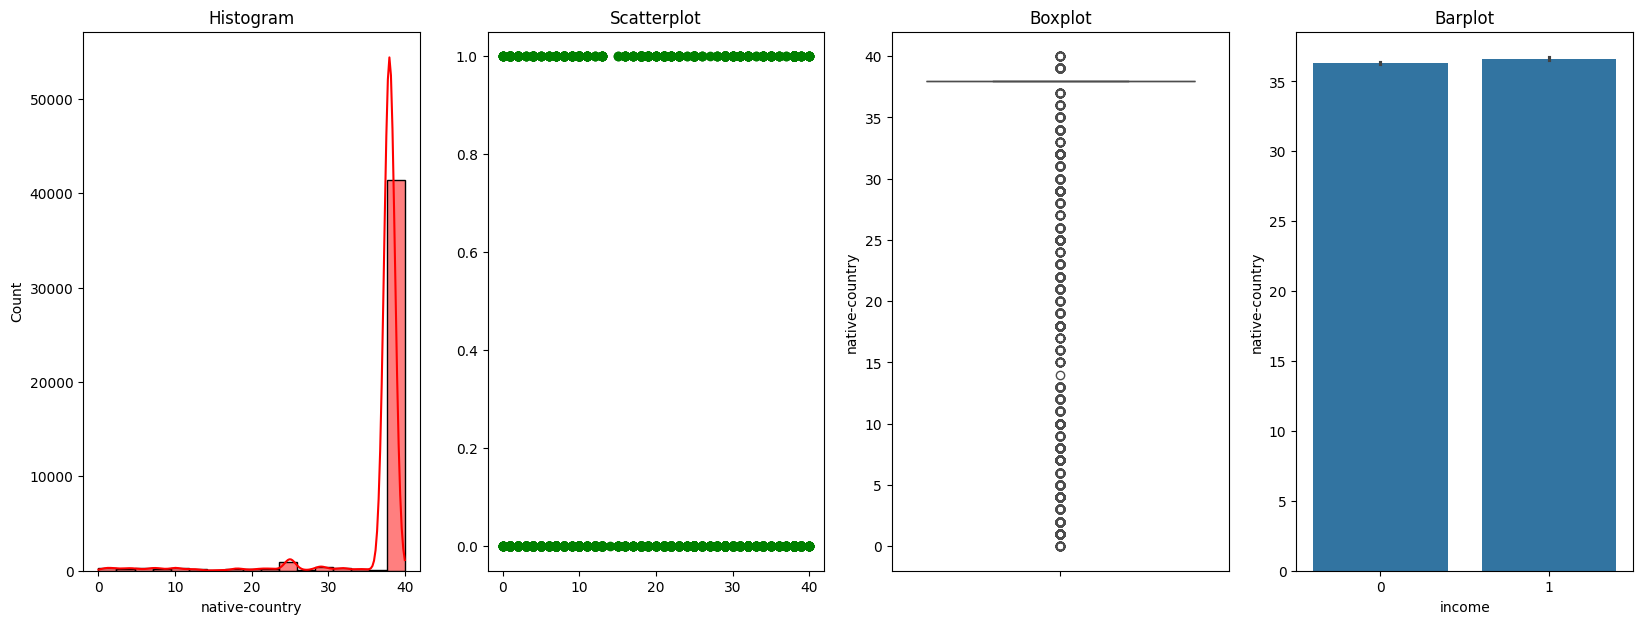

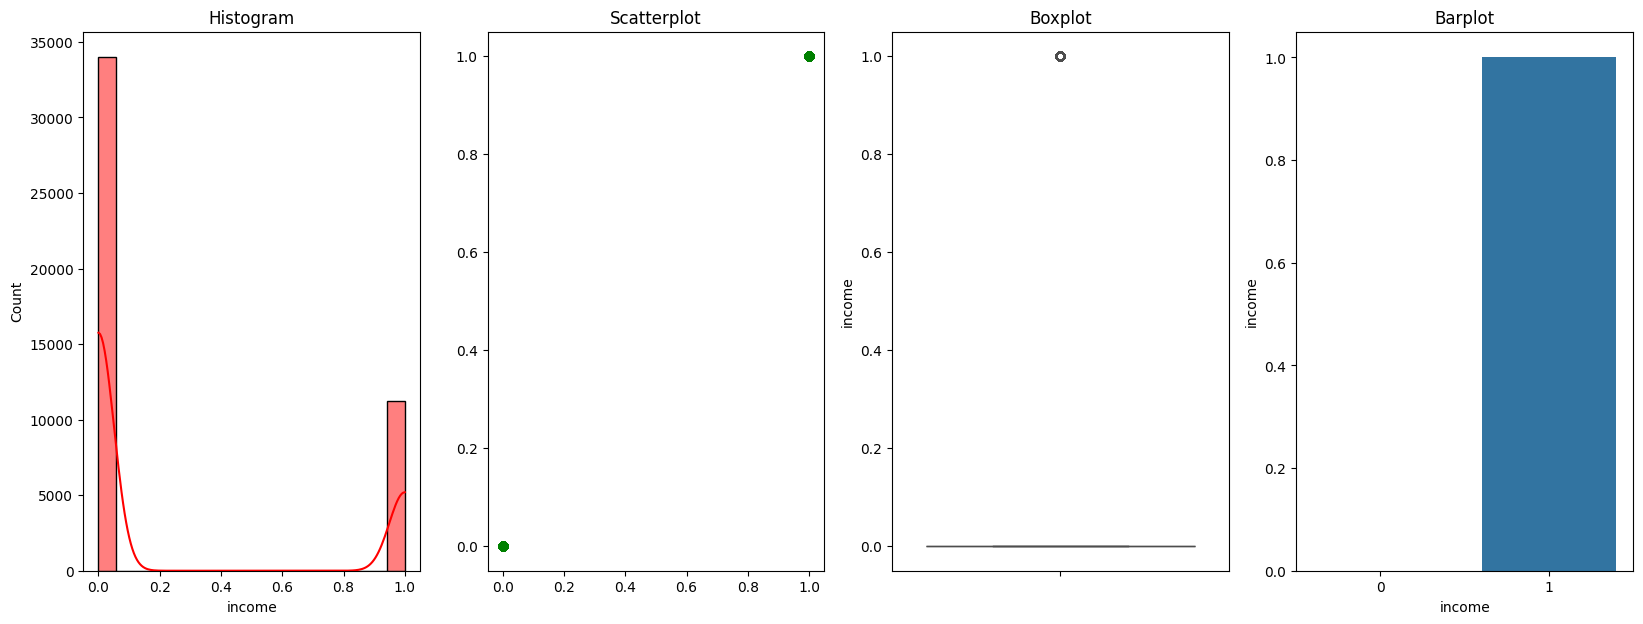

In [20]:
for col in df1:
    diagnostic_plots(df1,col,'income')

# Model

In [21]:
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn import metrics

In [22]:
# split Data
X = df1.drop(columns={"income"},axis=1)
y =df1["income"].values.reshape(-1,1) #target

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36140, 11)
y_train shape: (36140, 1)
X_test shape: (9035, 11)
y_test shape: (9035, 1)


### Scaling Data

In [24]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
# X_test = st.fit_transform(X_test)
X_test = st.transform(X_test)

In [25]:
#Find Best K 
# K = 20
# error =[]
# accuracy=[]
# for i in range(1,K+1):
#     knn= KNeighborsClassifier(n_neighbors= i)
#     knn.fit(X_train,y_train)
#     y_pred =knn.predict(X_test)
#     error.append(1-metrics.accuracy_score(y_test,y_pred))
#     accuracy.append(metrics.accuracy_score(y_test,y_pred))


In [26]:

# plt.figure(figsize=(20, 7))
# plt.subplot(1, 2, 1)
# plt.plot(range(1,21),error,'r-',marker='o')
# plt.xlabel('Values of K')
# plt.ylabel('Error')
# plt.grid()
# plt.title('Error vs K')

# plt.subplot(1, 2, 2)
# plt.plot(range(1,21),accuracy,'r-',marker='o')
# plt.xlabel('Values of K')
# plt.ylabel('accuracy')
# plt.grid()
# plt.title('accuracy vs K')

In [27]:
# K=20
# clf= KNeighborsClassifier(K)
# clf.fit(X_train,y_train)
# y_pred =clf.predict(X_test)
# print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

In [28]:
# Find Best K 
# training_acc = []
# test_acc = []

# # try KNN for different K nearest neighbor from 1 to 30
# neighbors_setting = range(1,25)
# for n_neighbors in neighbors_setting:
#     knn= KNeighborsClassifier(n_neighbors= n_neighbors, )
#     knn.fit(X_train,y_train.ravel())
#     training_acc.append(knn.score(X_train,y_train))
#     test_acc.append(knn.score(X_test,y_test))

# plt.plot(neighbors_setting,training_acc,label='Accuracy of the training set')
# plt.plot(neighbors_setting,test_acc,label='Accuracy of the test set')
# plt.ylabel('Accuracy')
# plt.xlabel('Number of Neighbors')
# plt.grid()
# plt.legend()
# plt.show()

In [29]:
#Find Best K 

# parameters = {"n_neighbors":range(1,25)}
# grid_kn=GridSearchCV(estimator=knn,#model
#                      param_grid=parameters, #range of K
#                     scoring='accuracy',# Strategy to evaluate the performance of the cross-validation model on the test set.
#                     cv= 10, # Cross-validation generator
#                     verbose= 1, #Time to calculate
#                     n_jobs= -1 #Help to cpu
#                     )
# grid_kn.fit(X_train,y_train.ravel())

In [30]:
# grid_kn.best_params_

In [31]:
# K=grid_kn.best_params_['n_neighbors']
model=KNeighborsClassifier(23)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.8222468179302712


In [32]:
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Female', 1: 'Male'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Federal-gov', 1: 'Local-gov', 2: 'Private', 3: 'Self-emp-inc', 4: 'Self-emp-not-inc', 5: 'State-gov', 6: 'Without-pay'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Adm-clerical', 1: 'Armed-Forces', 2: 'Craft-repair', 3: 'Exec-managerial', 4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct', 7: 'Other-service', 8: 'Priv-house-serv', 9: 'Prof-specialty', 10: 'Protective-serv', 11: 'Sales', 12: 'Tech-support', 13: 'Transport-moving'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Husband', 1: 'Not-in-family', 2: 'Other-relative', 3: 'Own-child', 4: 'Unmarried', 5: 'Wife'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Amer-Indian-Eskimo', 1: 'Asian-Pac-Islander', 2: 'Black', 3: 'Other', 4: 'White'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Cambodia', 1: 'Canada', 2: 'China', 3: 'Columbia', 4: 'Cuba', 5: 'Dominican-Republic', 6: 'Ecuador', 7: 'El-Salvador', 8: 'England', 9: 'France', 10: 'Germany', 11: 'Greece', 12: 'Guatemala', 13: 'Haiti', 14: 'Holand-Netherlands', 15: 'Honduras', 16: 'Hong', 17: 'Hungary', 18: 'India', 19: 'Iran', 20: 'Ireland', 21: 'Italy', 22: 'Jamaica', 23: 'Japan', 24: 'Laos', 25: 'Mexico', 26: 'Nicaragua', 27: 'Outlying-US(Guam-USVI-etc)', 28: 'Peru', 29: 'Philippines', 30: 'Poland', 31: 'Portugal', 32: 'Puerto-Rico', 33: 'Scotland', 34: 'South', 35: 'Taiwan', 36: 'Thailand', 37: 'Trinadad&Tobago', 38: 'United-States', 39: 'Vietnam', 40: 'Yugoslavia'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: '<=50K', 1: '>50K'}
#	28	1	336951	7	2	10	0	4	1	40	38	1
junge_prime_hat_sich_bayern_inter_ausgesucht = pd.DataFrame({
    'age': [37],  # Alter
    'workclass': [5],  # Kodiert wie in den Trainingsdaten
    'fnlwgt': [25345],  # Gewichtungsfaktor
    'education': [10],  # Kodiert wie in den Trainingsdaten
    'marital-status': [4],  # Kodiert wie in den Trainingsdaten
    'occupation': [11],  # Kodiert wie in den Trainingsdaten
    'relationship': [3],  # Kodiert wie in den Trainingsdaten
    'race': [4],  # Kodiert wie in den Trainingsdaten
    'gender': [0],  # Kodiert wie in den Trainingsdaten
    'hours-per-week': [80],  # Arbeitsstunden pro Woche
    'native-country': [38]  # Kodiert wie in den Trainingsdaten
})

# Skalieren der Eingabedaten
person_scaled = st.transform(junge_prime_hat_sich_bayern_inter_ausgesucht)


[0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65]
[15.7 20.6 25.5 30.4 35.3 40.2 45.1 50.  54.9 59.8 64.7]


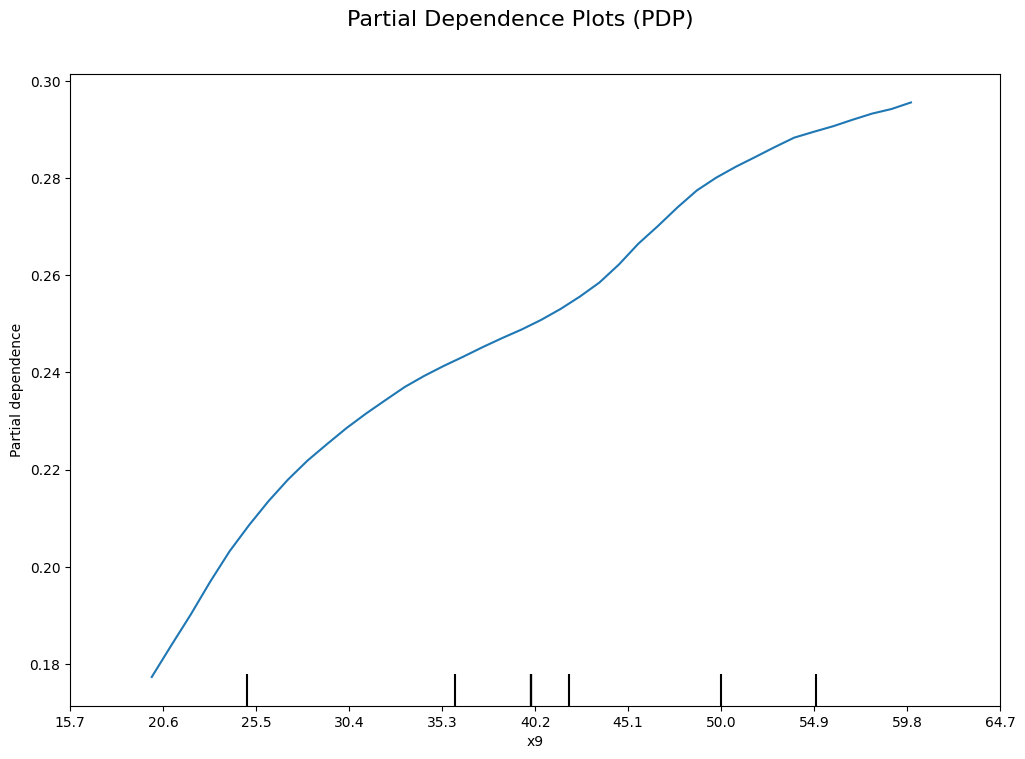

In [62]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Features for which you want to create the PDPs (e.g., 'age')
features = [9]  # Example: 'age' is the first feature
scale_factor = st.scale_[9]
shift = st.min_[9]

# Create the PDPs
fig, ax = plt.subplots(figsize=(12, 8))  # Optional: Larger display for clarity
pdp = PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax, grid_resolution=40)


actual_ax = pdp.axes_[0, 0]


#Adjust x-axis labels
xticks = actual_ax.get_xticks()
xticks_rescaled = (xticks - shift) / scale_factor  # Rescale back to original values
print(xticks)
print(xticks_rescaled)
actual_ax.set_xticks(xticks)
actual_ax.set_xticklabels([f"{tick:.1f}" for tick in xticks_rescaled])

# Add title
plt.suptitle("Partial Dependence Plots (PDP)", fontsize=16)
plt.subplots_adjust(top=0.9)  # Avoid title overlap

plt.show()

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[17.  24.3 31.6 38.9 46.2 53.5 60.8 68.1]


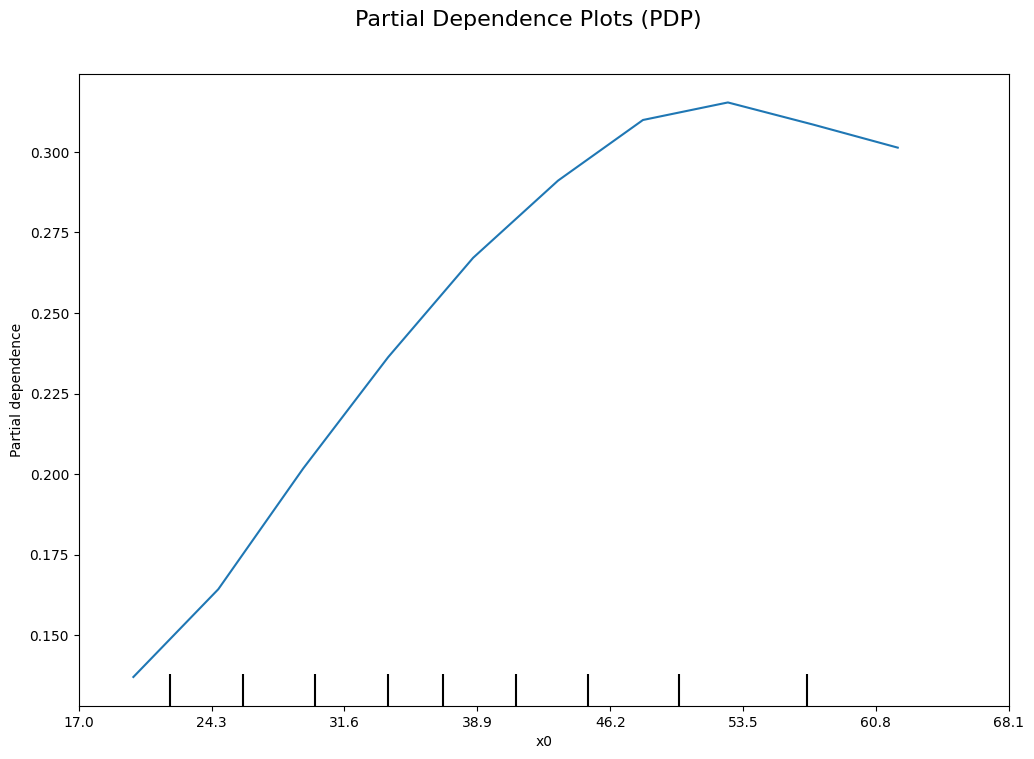

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Features for which you want to create the PDPs (e.g., 'age')
features = [0]  # Example: 'age' is the first feature
scale_factor = st.scale_[0]
shift = st.min_[0]

# Create the PDPs
fig, ax = plt.subplots(figsize=(12, 8))  # Optional: Larger display for clarity
pdp = PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax, grid_resolution=10)



actual_ax = pdp.axes_[0, 0]

#Adjust x-axis labels
xticks = actual_ax.get_xticks()
xticks_rescaled = (xticks - shift) / scale_factor  # Rescale back to original values
print(xticks)
print(xticks_rescaled)
actual_ax.set_xticks(xticks)
actual_ax.set_xticklabels([f"{tick:.1f}" for tick in xticks_rescaled])

# Add title
plt.suptitle("Partial Dependence Plots (PDP)", fontsize=16)
plt.subplots_adjust(top=0.9)  # Avoid title overlap

plt.show()

[0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[24. 26. 28. 30. 32. 34. 36. 38. 40.]


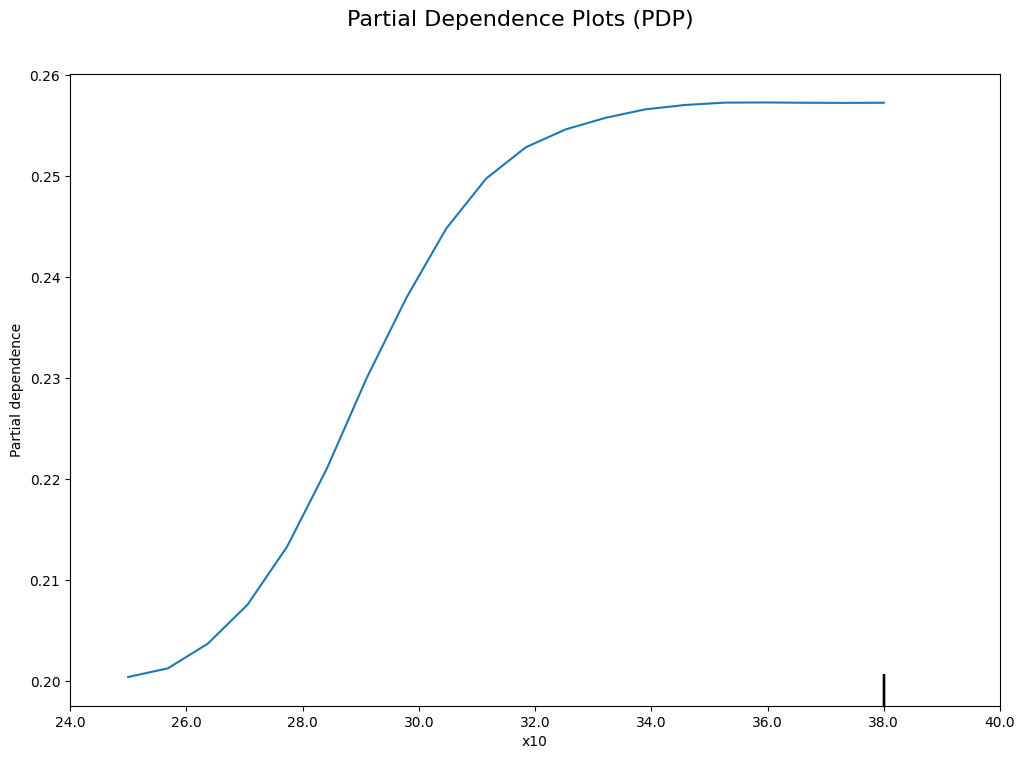

In [63]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Features for which you want to create the PDPs (e.g., 'age')
features = [10]  # Example: 'age' is the first feature
scale_factor = st.scale_[10]
shift = st.min_[10]

# Create the PDPs
fig, ax = plt.subplots(figsize=(12, 8))  # Optional: Larger display for clarity
pdp = PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax, grid_resolution=20)


actual_ax = pdp.axes_[0, 0]


#Adjust x-axis labels
xticks = actual_ax.get_xticks()
xticks_rescaled = (xticks - shift) / scale_factor  # Rescale back to original values
print(xticks)
print(xticks_rescaled)
actual_ax.set_xticks(xticks)
actual_ax.set_xticklabels([f"{tick:.1f}" for tick in xticks_rescaled])

# Add title
plt.suptitle("Partial Dependence Plots (PDP)", fontsize=16)
plt.subplots_adjust(top=0.9)  # Avoid title overlap

plt.show()